In [36]:
from torch import nn,optim
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset,DataLoader

In [23]:
x=torch.zeros(100,2)
x[:,0]=torch.randn(100)
x[:,1]=torch.randn(100)
x1=x[:70]
y1=y[:70]

In [25]:
x1.shape

torch.Size([70, 2])

In [37]:
class Data(Dataset):
    def __init__(self,train=True):
        self.x=torch.zeros(100,2)
        self.x[:,0]=torch.randn(100)
        self.x[:,1]=torch.randn(100)
        self.y=0.1*torch.randn((self.x.shape[0],1))
        if train:
            self.x=self.x[:70]
            self.y=self.y[:70]
        else:
            self.x=self.x[70:]
            self.y=self.y[70:]
        self.len=self.x.shape[0]
    
    def __getitem__(self,index):
        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.len

In [38]:
train_data=Data()
validation_data=Data(train=False)

In [39]:
len(train_data)

70

In [40]:
len(validation_data)

30

In [41]:
class LinearRegression(nn.Module):
    def __init__(self,input_size,output_size):
        super(LinearRegression,self).__init__()
        self.linear=nn.Linear(input_size,output_size)
    
    def forward(self,x):
        yhat=self.linear(x)
        return yhat

In [42]:
criterion=nn.MSELoss()
trainloader=DataLoader(dataset=train_data,batch_size=2)

In [43]:
learning_rate=[0.0001,0.001,0.01,0.1]
train_error=torch.zeros(len(learning_rate))
validation_error=torch.zeros(len(learning_rate))
models=[]

In [44]:
def train_model(iteration,learning):
    for i,lr in enumerate(learning):
        model=LinearRegression(2,1)
        optimizer=optim.SGD(model.parameters(),lr=lr)
        for epoch in range(iteration):
            for x,y in trainloader:
                yhat=model(x)
                loss=criterion(yhat,y)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
        yhat=model(train_data.x)
        train_loss=criterion(yhat,train_data.y)
        train_error[i]=train_loss.item()
        
        yhat=model(validation_data.x)
        validation_loss=criterion(yhat,validation_data.y)
        validation_error[i]=validation_loss.item()
        models.append(model)

In [45]:
train_model(10,learning_rate)

In [46]:
train_error

tensor([0.5045, 0.0320, 0.0122, 0.0132])

In [47]:
train=train_error.numpy()

In [48]:
train

array([0.5045003 , 0.03198455, 0.0122335 , 0.01321622], dtype=float32)

In [49]:
validation_error

tensor([0.9041, 0.0251, 0.0126, 0.0150])

In [50]:
valid=validation_error.numpy()

In [51]:
valid

array([0.90407985, 0.02505676, 0.01260839, 0.01496473], dtype=float32)

In [53]:
learning_rate

[0.0001, 0.001, 0.01, 0.1]

In [54]:
l=np.array(learning_rate)

In [55]:
l

array([0.0001, 0.001 , 0.01  , 0.1   ])

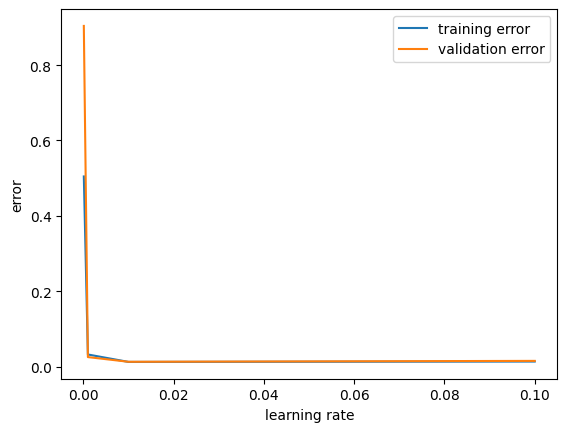

In [57]:
plt.plot(l,train,label='training error')
plt.plot(l,valid,label='validation error')
plt.xlabel('learning rate')
plt.ylabel('error')
plt.legend()
plt.show()